# Market Basket Analysis using Apriori



---



<p align="justify">This analysis explores market basket data to discover interesting relationships between items. By employing the Apriori algorithm, frequent itemsets are identified, and association rules are generated to reveal patterns and insights into customer purchasing behavior. The results are visualized using scatter plots and network graphs to provide a clear representation of the discovered relationships and their strength.



---



## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

## Create the Dataset

In [9]:
transactions = [
    ['coffee', 'tea', 'sugar'],
    ['coffee', 'bread'],
    ['tea', 'biscuits'],
    ['coffee', 'tea', 'biscuits'],
    ['bread', 'sugar'],
    ['coffee', 'tea', 'sugar', 'biscuits'],
    ['coffee'],
    ['tea'],
    ['sugar', 'biscuits'],
    ['coffee', 'bread', 'tea']
]

## Transform the Dataset

In [10]:
te = TransactionEncoder()
te_data = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_data,columns=te.columns_)

In [11]:
df

,biscuits,bread,coffee,sugar,tea
0,False,False,True,True,True
1,False,True,True,False,False
2,True,False,False,False,True
3,True,False,True,False,True
4,False,True,False,True,False
5,True,False,True,True,True
6,False,False,True,False,False
7,False,False,False,False,True
8,True,False,False,True,False
9,False,True,True,False,True


## Generate Frequent Itemsets and Rules

## Apply Apriori

In [12]:
frequent_itemsets = apriori(df, min_support=0.2, use_colnames=True)

## Generate Association Rules

In [13]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2)

In [14]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(sugar),(biscuits),0.4,0.4,0.2,0.500000,1.250000,1.0,0.04,1.2,0.333333,0.333333,0.166667,0.500000
1,(biscuits),(sugar),0.4,0.4,0.2,0.500000,1.250000,1.0,0.04,1.2,0.333333,0.333333,0.166667,0.500000
2,(tea),(biscuits),0.6,0.4,0.3,0.500000,1.250000,1.0,0.06,1.2,0.500000,0.428571,0.166667,0.625000
3,(biscuits),(tea),0.4,0.6,0.3,0.750000,1.250000,1.0,0.06,1.6,0.333333,0.428571,0.375000,0.625000
4,"(tea, coffee)",(biscuits),0.4,0.4,0.2,0.500000,1.250000,1.0,0.04,1.2,0.333333,0.333333,0.166667,0.500000
5,"(biscuits, coffee)",(tea),0.2,0.6,0.2,1.000000,1.666667,1.0,0.08,inf,0.500000,0.333333,1.000000,0.666667
6,(tea),"(biscuits, coffee)",0.6,0.2,0.2,0.333333,1.666667,1.0,0.08,1.2,1.000000,0.333333,0.166667,0.666667
7,(biscuits),"(tea, coffee)",0.4,0.4,0.2,0.500000,1.250000,1.0,0.04,1.2,0.333333,0.333333,0.166667,0.500000
8,"(tea, sugar)",(coffee),0.2,0.6,0.2,1.000000,1.666667,1.0,0.08,inf,0.500000,0.333333,1.000000,0.666667
9,"(tea, coffee)",(sugar),0.4,0.4,0.2,0.500000,1.250000,1.0,0.04,1.2,0.333333,0.333333,0.166667,0.500000


## Visualisations

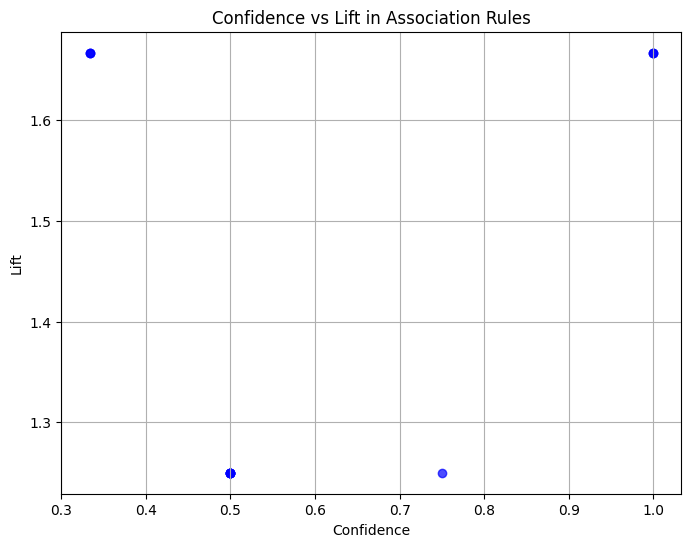

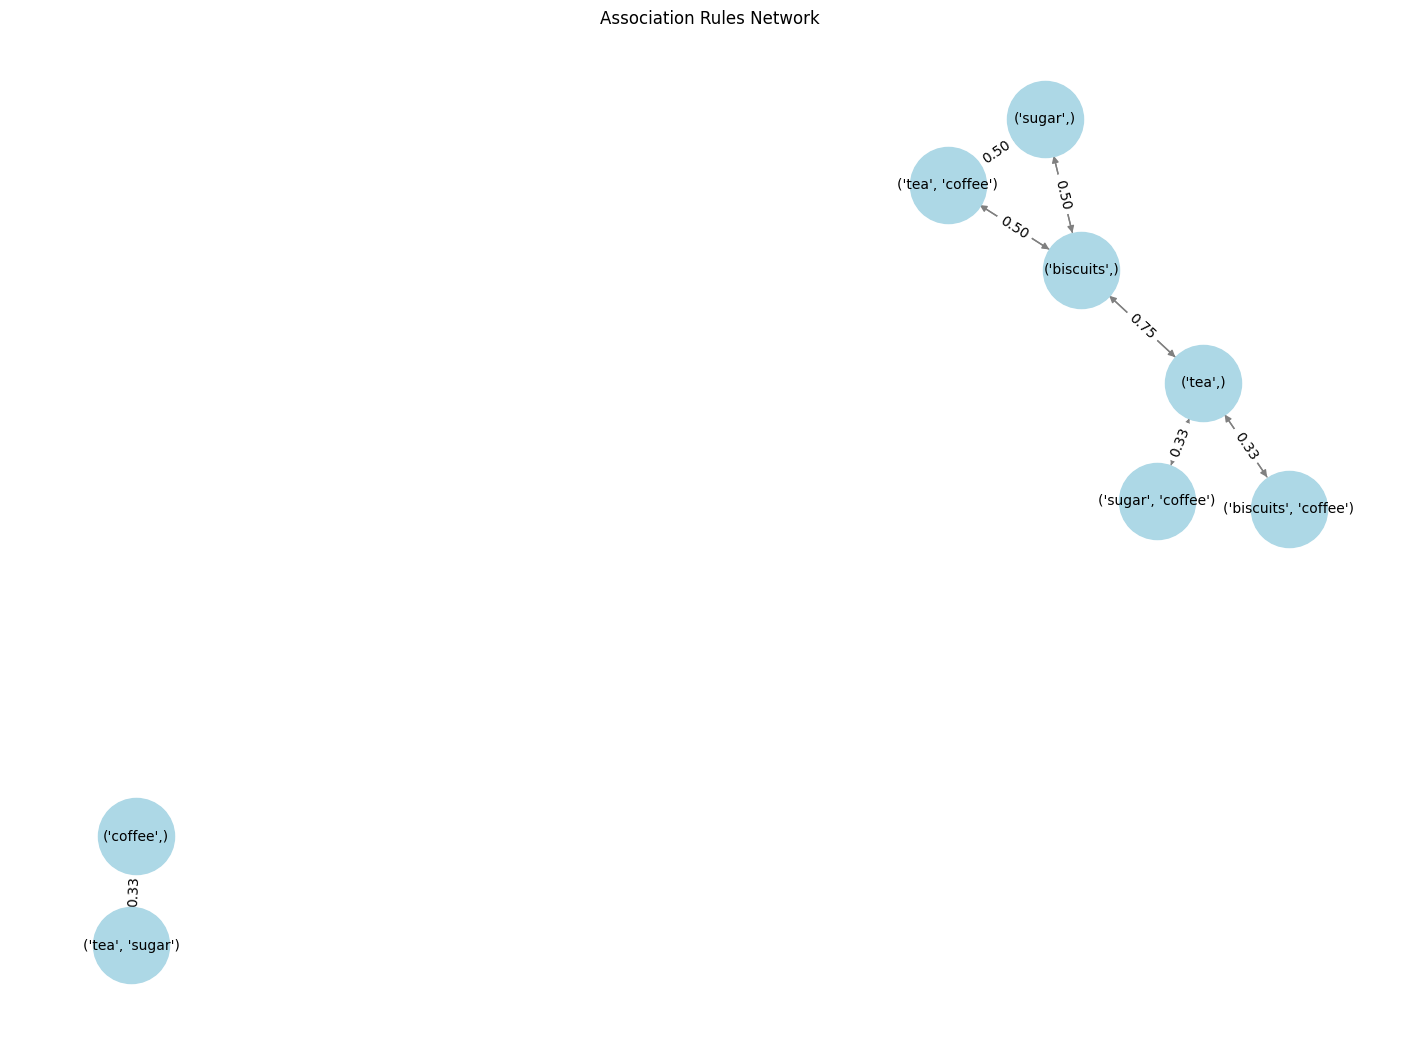

In [25]:
# Scatter plot of confidence vs lift
plt.figure(figsize=(8,6))
plt.scatter(rules['confidence'], rules['lift'], alpha=0.7, color='b')
plt.xlabel('Confidence')
plt.ylabel('Lift')
plt.title('Confidence vs Lift in Association Rules')
plt.grid()
plt.show()

print("\n\n")

# Visualizing association rules as a network graph
G = nx.DiGraph()
for _, row in rules.iterrows():
    G.add_edge(tuple(row['antecedents']), tuple(row['consequents']), weight=row['confidence'])
plt.figure(figsize=(14, 10))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=3000, font_size=10)
edge_labels = {(tuple(row['antecedents']), tuple(row['consequents'])): f"{row['confidence']:.2f}"
               for _, row in rules.iterrows()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("Association Rules Network")
plt.show()

## Findings

<p align="justify">The analysis identified frequent itemsets, which are combinations of items that appear together in a significant portion of the transactions. For example, the combination of 'coffee' and 'tea' was found to be a frequent itemset.

<p align="justify">The scatter plot visualization helps to understand the relationship between the confidence and lift of the generated rules. Rules with high confidence and high lift are particularly interesting as they represent strong and non-random associations between items.

<p align="justify">The network graph provides a clear visual representation of the discovered association rules. Nodes in the graph represent items, and directed edges indicate the association rules, flowing from the antecedent(s) to the consequent(s). The thickness or color of the edges can be used to represent the strength of the association, often measured by confidence or lift. For instance, a strong edge from 'coffee' to 'sugar' would suggest that customers who buy coffee are likely to also buy sugar. Analyzing this network can highlight key relationships and potential cross-selling opportunities.